In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the ratings and movie metadata datasets and exploring them.

In [5]:
# Read the movies_metadata file
movies_metadata = pd.read_csv(r'C:\Users\HP\Downloads\AI Movie Night Recommendation\Workspace\movies_metadata.csv')

# Read the ratings file
ratings = pd.read_csv(r'C:\Users\HP\Downloads\AI Movie Night Recommendation\Workspace\ratings.csv')

In [6]:
movies_metadata

,movie_id,title,overview,vote_average,vote_count
0,95765.0,Cinema Paradiso,"A filmmaker recalls his childhood, when he fel...",8.2,834.0
1,67116.0,The French Connection,Tough narcotics detective 'Popeye' Doyle is in...,7.4,435.0
2,80801.0,The Gods Must Be Crazy,Misery is brought to a small group of Sho in t...,7.1,251.0
3,96446.0,Willow,Fearful of a prophecy stating that a girl chil...,6.9,484.0
4,112697.0,Clueless,"Shallow, rich and socially successful Cher is ...",6.9,828.0
...,...,...,...,...,...
9005,443489.0,Dreamgirls,"Three young women – Deena Jones, Effie White a...",6.6,292.0
9006,102855.0,Scream of Stone,"A meeting of two world famous climbers, one an...",7.5,4.0
9007,36506.0,Day of Wrath,"In a 17th-century Danish village, an old woman...",8.3,41.0
9008,71583.0,The Groove Tube,Chevy Chase makes his film debut in this rioto...,5.3,3.0


In [7]:
ratings

,user_id,movie_id,rating
0,2,113862.0,3.0
1,2,114898.0,3.0
2,2,109444.0,4.0
3,2,109830.0,3.0
4,2,111257.0,3.0
...,...,...,...
99788,664,119008.0,4.5
99789,665,110322.0,4.0
99790,665,171363.0,2.0
99791,665,236493.0,3.0


In [8]:
# Count how many movies are there
unique_movies = movies_metadata['movie_id'].nunique()
print(f"Number of unique movies: {unique_movies}")

Number of unique movies: 9010


In [9]:
# Count how many unique users have rated how many unique movies
unique_users = ratings['user_id'].nunique()
unique_rated_movies = ratings['movie_id'].nunique()
print(f"Number of unique users: {unique_users}")
print(f"Number of unique rated movies: {unique_rated_movies}")

Number of unique users: 671
Number of unique rated movies: 9010


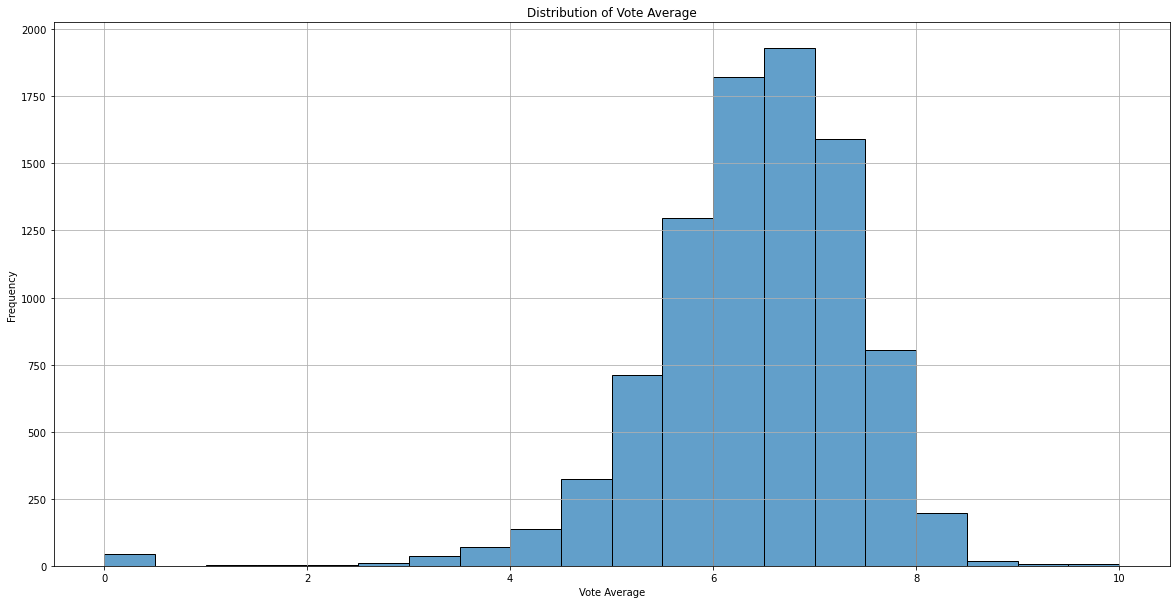

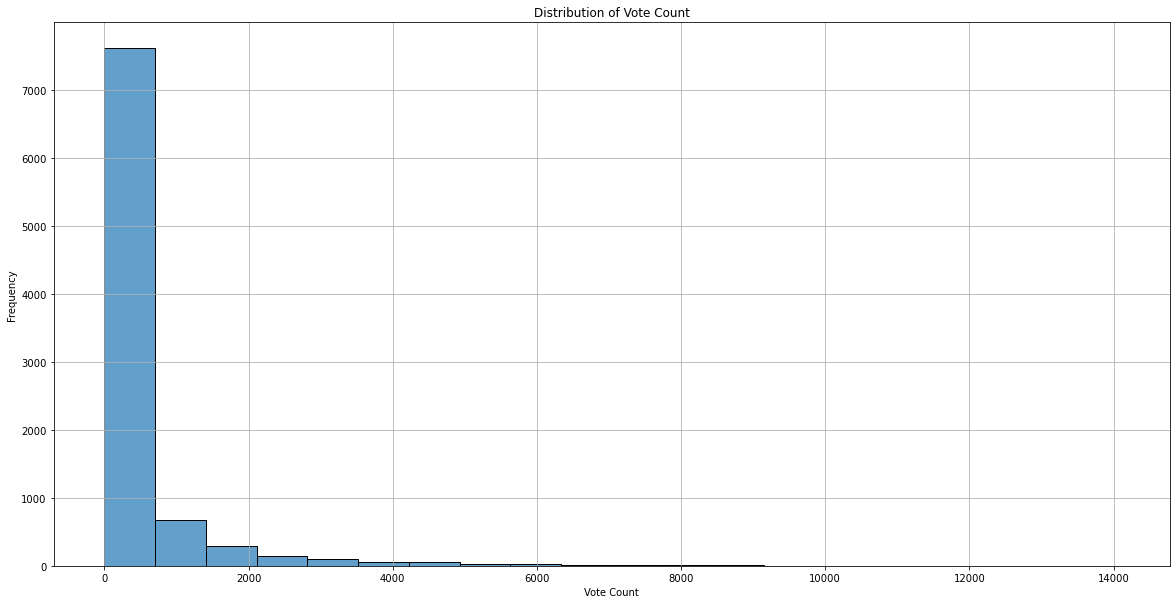

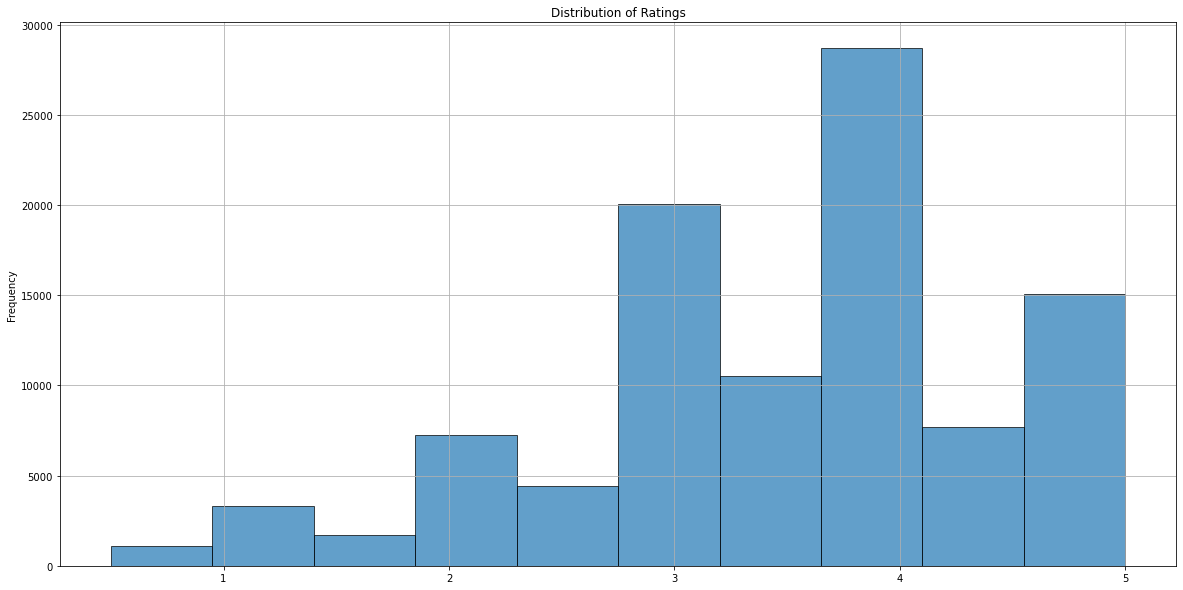

In [10]:
# Visualise the vote_average column
plt.figure(figsize=(20, 10))
sns.histplot(movies_metadata['vote_average'].dropna(), bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualise the vote_count column
plt.figure(figsize=(20, 10))
sns.histplot(movies_metadata['vote_count'].dropna(), bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#visualise the distribution of the rating column
plt.figure(figsize=(20, 10))
plt.hist(ratings['rating'].dropna(), bins=10, edgecolor='k', alpha=0.7)
plt.title('Distribution of Ratings')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Building a simple recommender based on popularity or highest rating

A recommender is any system that generates suggestions for an end user. We will start with creating the simplest recommender, one that ranks all movies according to the highest average score, or the highest number of votes.
This kind of recommender generates the same output for anyone using it

In [11]:
def simple_recommender(movies_metadata, criterion='vote_average', top_n=10):
    """
    Generate a simple recommender based on the specified criterion.
    
    Parameters:
    - movies_metadata (DataFrame): DataFrame containing movie metadata.
    - criterion (str): Criterion to base recommendations on ('vote_average' or 'vote_count').
    - top_n (int): Number of top movies to recommend.
    
    Returns:
    - DataFrame: Top recommended movies based on the specified criterion.
    """
    if criterion not in ['vote_average', 'vote_count']:
        raise ValueError("Criterion must be either 'vote_average' or 'vote_count'")
    
    # Sort movies by the specified criterion in descending order
    recommended_movies = movies_metadata.sort_values(by=criterion, ascending=False)
    
    # Select the top N movies
    top_recommended_movies = recommended_movies.head(top_n)
    
    return top_recommended_movies[['movie_id', 'title', 'overview', criterion]]

In [12]:
top_movies_by_average=simple_recommender(movies_metadata, criterion='vote_average', top_n=10)
top_movies_by_average

,movie_id,title,overview,vote_average
430,2751904.0,Survive and Advance,"In 1983, the NC State Wolfpack, coached by Jim...",10.0
2882,113270.0,"The Haunted World of Edward D. Wood, Jr.",The strange life and the wonderfully awful fil...,10.0
8907,114241.0,Reckless,"On Christmas eve, a relentlessly cheerful woma...",10.0
873,118925.0,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",10.0
6603,79278.0,Chilly Scenes of Winter,A man falls for a separated woman but can't co...,10.0
8363,109381.0,Carmen Miranda: Bananas Is My Business,A biography of the Portuguese-Brazilian singer...,10.0
7463,97099.0,Common Threads: Stories from the Quilt,"In the late 1970s, a mysterious new disease be...",10.0
1910,98769.0,The Civil War,This highly acclaimed mini series traces the c...,9.2
6136,81846.0,Cosmos,Astronomer Dr. Carl Sagan is host and narrator...,9.1
5441,2042520.0,Family Band: The Cowsills Story,"The story of the Cowsills, an American band co...",9.0


In [13]:
top_movies_by_count=simple_recommender(movies_metadata, criterion='vote_count', top_n=10)
top_movies_by_count

,movie_id,title,overview,vote_count
67,1375666.0,Inception,"Cobb, a skilled thief who commits corporate es...",14075.0
5577,468569.0,The Dark Knight,Batman raises the stakes in his war on crime. ...,12269.0
5761,499549.0,Avatar,"In the 22nd century, a paraplegic Marine is di...",12114.0
8033,848228.0,The Avengers,When an unexpected enemy emerges and threatens...,12000.0
6935,1431045.0,Deadpool,Deadpool tells the origin story of former Spec...,11444.0
278,816692.0,Interstellar,Interstellar chronicles the adventures of a gr...,11187.0
6711,1853728.0,Django Unchained,"With the help of a German bounty hunter, a fre...",10297.0
1360,2015381.0,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",10014.0
7828,137523.0,Fight Club,A ticking-time-bomb insomniac and a slippery s...,9678.0
4484,1392170.0,The Hunger Games,Every year in the ruins of what was once North...,9634.0


# Generate recommendations based on user ratings

In [14]:
from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
def create_user_based_recommender(movies_metadata, ratings, movie_title, top_n=10):
    # Merge movies_metadata with ratings
    movie_ratings = pd.merge(ratings, movies_metadata, on='movie_id')
    
    # Create pivot table with users as rows, movies as columns and ratings as values
    user_movie_matrix = movie_ratings.pivot_table(index='user_id', columns='title', values='rating')
    
    # Fill NaN values with 0 (assuming unrated movies have a rating of 0)
    user_movie_matrix.fillna(0, inplace=True)
    
    # Compute the cosine similarity index
    movie_similarity = cosine_similarity(user_movie_matrix.T)
    
    # Convert the similarity matrix to a DataFrame
    movie_similarity_df = pd.DataFrame(movie_similarity, index=user_movie_matrix.columns,
                                       columns=user_movie_matrix.columns)
    
    # Get the list of similar movies
    similar_movies = movie_similarity_df[movie_title].sort_values(ascending=False)[1:top_n+1]
    
    return similar_movies

In [16]:
movie_title = 'The Godfather' # Replace with the movie title you want to get recommendations for
recommended_movies = create_user_based_recommender(movies_metadata, ratings, movie_title, top_n=10)
recommended_movies

title
The Godfather: Part II             0.773685
GoodFellas                         0.620349
One Flew Over the Cuckoo's Nest    0.568244
American Beauty                    0.557997
Star Wars                          0.546750
Raiders of the Lost Ark            0.538185
Saving Private Ryan                0.534684
Apocalypse Now                     0.534347
Reservoir Dogs                     0.531713
The Usual Suspects                 0.530727
Name: The Godfather, dtype: float64

# Generate embedding similarity to generate movie recommendations

In [14]:
# !pip install sentence-transformers

In [2]:
# pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu
Note: you may need to restart the kernel to use updated packages.


In [1]:
# pip uninstall torch torchvision torchaudio

^C
Note: you may need to restart the kernel to use updated packages.


In [1]:
from sentence_transformers import SentenceTransformer
import pandas as pd
from tqdm import tqdm

C:\ProgramData\Anaconda3\lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
# Load a pre-trained model from Sentence Transformers
model = SentenceTransformer('all-MiniLM-L6-v2')

C:\ProgramData\Anaconda3\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [17]:
# Ensure the 'overview' column is filled with strings
movies_metadata['overview'] = movies_metadata['overview'].fillna('').astype(str)

# Generate embeddings for each movie overview
tqdm.pandas(desc="Generating embeddings")
movies_metadata['embedding'] = movies_metadata['overview'].progress_apply(lambda x: model.encode(x).tolist())

C:\ProgramData\Anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
Generating embeddings: 100%|██████████| 9010/9010 [06:05<00:00, 24.63it/s]


In [18]:
movies_metadata

,movie_id,title,overview,vote_average,vote_count,embedding
0,95765.0,Cinema Paradiso,"A filmmaker recalls his childhood, when he fel...",8.2,834.0,"[-0.0542561374604702, -0.031655214726924896, -..."
1,67116.0,The French Connection,Tough narcotics detective 'Popeye' Doyle is in...,7.4,435.0,"[-0.10362894833087921, -0.08074166625738144, -..."
2,80801.0,The Gods Must Be Crazy,Misery is brought to a small group of Sho in t...,7.1,251.0,"[-0.005189950577914715, 0.10656533390283585, 0..."
3,96446.0,Willow,Fearful of a prophecy stating that a girl chil...,6.9,484.0,"[-0.01296099741011858, 0.0008763280929997563, ..."
4,112697.0,Clueless,"Shallow, rich and socially successful Cher is ...",6.9,828.0,"[0.00983126275241375, 0.011321267113089561, 0...."
...,...,...,...,...,...,...
9005,443489.0,Dreamgirls,"Three young women – Deena Jones, Effie White a...",6.6,292.0,"[-0.05494531989097595, -0.11685415357351303, -..."
9006,102855.0,Scream of Stone,"A meeting of two world famous climbers, one an...",7.5,4.0,"[-0.08654404431581497, 0.011550519615411758, -..."
9007,36506.0,Day of Wrath,"In a 17th-century Danish village, an old woman...",8.3,41.0,"[0.00856681726872921, 0.12342218309640884, -0...."
9008,71583.0,The Groove Tube,Chevy Chase makes his film debut in this rioto...,5.3,3.0,"[-0.05006125569343567, 0.030198227614164352, -..."


# Use Embedding Similarity to Generate Recommendations

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recommend_movies(description, n=5):
    # Generate embedding for the user input
    user_embedding = model.encode(description).tolist()
    
    # Calculate cosine similarity between user input embedding and all movie embeddings
    movies_metadata['similarity'] = movies_metadata['embedding'].apply(lambda x: cosine_similarity([user_embedding], [x])[0][0])
    
    # Sort movies by similarity and get the top n recommendations
    recommendations = movies_metadata.sort_values(by='similarity', ascending=False).head(n)
    
    return recommendations[['title', 'overview', 'similarity']]

# Example Usage
user_description = "A thrilling adventure with lots of action and suspense"
recommendations = recommend_movies(user_description, n=5)
recommendations

,title,overview,similarity
137,Tape,A three-character ensemble piece set within th...,0.540018
3584,Fatal Instinct,A spoof of the late 80s and early 90s suspense...,0.537884
6869,King Kong,An adventure film about a film crew in search ...,0.522756
6594,A Most Violent Year,A thriller set in New York City during the win...,0.485806
1816,Deadfall,A thriller that follows two siblings who decid...,0.481312


In [20]:
user_description = "A superhero movie"
recommendations = recommend_movies(user_description, n=5)
recommendations

,title,overview,similarity
8402,The Pumaman,Low-budget superhero flick about a young man g...,0.527463
1640,Super,After his wife falls under the influence of a ...,0.526745
3734,Megamind,Bumbling supervillain Megamind finally defeats...,0.511260
3561,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,0.499095
7856,Mystery Men,When Captain Amazing (Kinnear) is kidnapped by...,0.493855
